In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.animation as animation
import re

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


## 1. Fundamential diagrams

In [3]:
n_lane = [1, 2]
v_max = 5

directory = 'calculate/data/'
file_name = 'fundamental'

In [4]:
tabels_fundamential = [pd.read_csv(directory+file_name+f"_lane_{n}_v_{v_max}.csv") for n in n_lane]
tabels_v_3 = pd.read_csv(directory+file_name+f"_lane_{2}_v_{3}.csv")

In [5]:
rho = [np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel['rho'].values]) for tabel in tabels_fundamential]
flow = [np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel['flow'].values]) for tabel in tabels_fundamential]

rho_3 = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabels_v_3['rho'].values])
flow_3 = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabels_v_3['flow'].values])

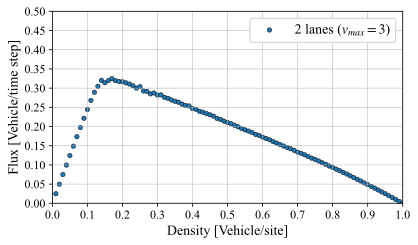

In [9]:
width, height = 16, 9 # in cm
fig = plt.figure(figsize=(width/2.54, height/2.54), dpi=300)

#for i in range(rho[i_tabl].shape[1]):
#    label = f'lane {i}'
#    plt.plot(rho[i_tabl][:,i], flow[i_tabl][:,i], label=label, linewidth=1)

fs = 14

label = "all lane"
#plt.scatter(rho[0].mean(axis=1), flow[0].mean(axis=1), label='1 lane $v_{max}='+str(v_max)+'$', edgecolors='black', s=25, linewidths=0.5)
#plt.scatter(rho[1].mean(axis=1), flow[1].mean(axis=1), label='2 lanes $v_{max}='+str(v_max)+'$', edgecolors='black', s=25, linewidths=0.5)
plt.scatter(rho_3.mean(axis=1), flow_3.mean(axis=1), label='2 lanes ($v_{max}='+str(3)+'$)', edgecolors='black', s=20, linewidths=0.5)

plt.ylim(0,0.5)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11), fontsize=fs-2)
plt.yticks(np.linspace(0,0.5,11), fontsize=fs-2)
plt.legend(loc='upper right', fontsize=fs, framealpha=1)
plt.xlabel(r'Density [Vehicle/site]',  fontsize = fs)
plt.ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
#plt.title(r'Сomparison of models', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [10]:
fig.savefig('calculate/data/fundamential_diagramm.tiff', dpi=300, format='tiff', bbox_inches = "tight")

## 2. Bus research

In [11]:
directory = 'calculate/data/'
file_name = 'bus'
n_cells = 1000
# variable 
steps = [1000]+[1000, 200, 100, 50]+[100, 50]+[25] #[1000, 1000, 200, 100, 50, 50, 50, 100, 100]
n_station = [0]+[1, 5, 10, 20]+[5, 10]+[40]    #[0, 1, 5, 10, 20, 5, 10, 5, 20]
colors = ['#55C144'] +  4*['#71A8E8'] +  2*['#F5A623'] #['#55C144']+['#123F73', '#19579F', '#2378DC', '#71A8E8']+['#F5A623', '#F9C979']
marker = ["o"]+["o", "s", "^", "D"]+["o", "s"]
tabels_bus = []
vel_average = []

In [12]:
for step, stat in zip(steps, n_station):
    name = directory + file_name + f"_step_{step}_station_{stat}.csv"
    tabels_bus.append(pd.read_csv(name))

In [13]:
vel_buses = [[float(row.split('[')[1].split(']')[0]) for row in tabel['velosity_av_typed'].values] for tabel in tabels_bus]

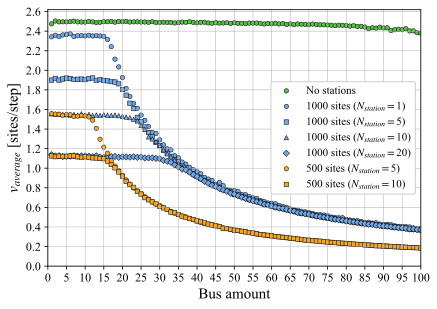

In [14]:
width, height = 2*8.5, 2*6 # in cm
fig = plt.figure(figsize=(width/2.54, height/2.54), dpi=300)

buses_arr = np.arange(1, 101)

fs = 14

for average, n_star, step_station, color, mark in zip(vel_buses, n_station, steps, colors, marker):
    if n_star == 0:
        label = "No stations"
    else:
        label = f"{int(step_station)*n_star} sites ("+"$N_{station}=$"+str(n_star)+')' #+f" step: {int(step_station)})"
        
    plt.scatter(buses_arr, average, label=label, edgecolors='black', s=20, linewidths=0.5, c=color, marker=mark)

#plt.ylim(0,2.5)
plt.xlim(0,100)
plt.xticks(np.linspace(0,100,101)[::5], fontsize=fs-2)
plt.yticks(np.linspace(0,2.7,28)[::2], fontsize=fs-2)
plt.legend(loc='center right', fontsize=fs-3, framealpha=1)
plt.xlabel(r'Bus amount',  fontsize = fs+1)
plt.ylabel(r'$v_{average}$ [sites/step]',  fontsize = fs+1)
#plt.title(f'Road length {n_cells} cells', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [90]:
n_s = np.array(n_station)
st = np.array(steps)
(n_s * ( 1 + (st-1)/(20*3) )).astype(int)

array([ 0, 17, 21, 26, 36, 13, 18, 56])

In [85]:
n_s*(1 +  st/(60))

array([ 0.        , 17.66666667, 21.66666667, 26.66666667, 36.66666667,
       13.33333333, 18.33333333, 56.66666667])

In [68]:
max_bus.astype(int)

array([ 0, 17, 21, 26, 36, 13, 18])

In [15]:
fig.savefig('calculate/data/buses_average.tiff', dpi=400, format='tiff', bbox_inches = "tight")

## 3. Research system bus-vehicle

In [39]:
station_step = 70
bus_capasity = 80
n_cells = 1000
n_lane = 2
peop_arr = np.array([100, 300, 1000, 1600])
proportion = np.linspace(0,1, 101)
tabels_city = [pd.read_csv(f'calculate/data/table_city_{people}.csv', index_col=0) for people in peop_arr]
tabels_vehicle = [pd.read_csv(f"calculate/data/table_veh_{people}.csv", names=['bus', 'hdv'], header=None, skiprows=1) for people in peop_arr]

__Vehicle type characteristics__

In [40]:
# in columns is average velosity for all vehicles 
# for get average velosity for vehicle should devision to amount of vehicle
tabels_vehicle[0].astype(str).head(4)

,bus,hdv
0,0.0,[2.48344]
1,[1.2945],[2.47264646]
2,[1.3],[2.47898469]
3,[1.325],[2.47675773]


In [41]:
def delet_skob(s):
    return re.sub('\[|\]', '', s)

In [42]:
amount_hdv = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)[:,::-1]
amount_bus = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)
amount_bus = np.ceil(amount_bus/bus_capasity).astype(int)
rho_bus = amount_bus/n_cells/n_lane
rho_hdv = amount_hdv/n_cells/n_lane

In [43]:
velosity_bus = np.array([[val for val in tab['bus'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])
velosity_hdv = np.array([[val for val in tab['hdv'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])

__Lanes characteristics__

In [44]:
rho = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['rho'].values] for tab in tabels_city])
flow = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['flow'].values] for tab in tabels_city])
flow.mean(axis=2).shape

(4, 101)

In [45]:
velosity_all = flow.mean(axis=2)/rho.mean(axis=2)

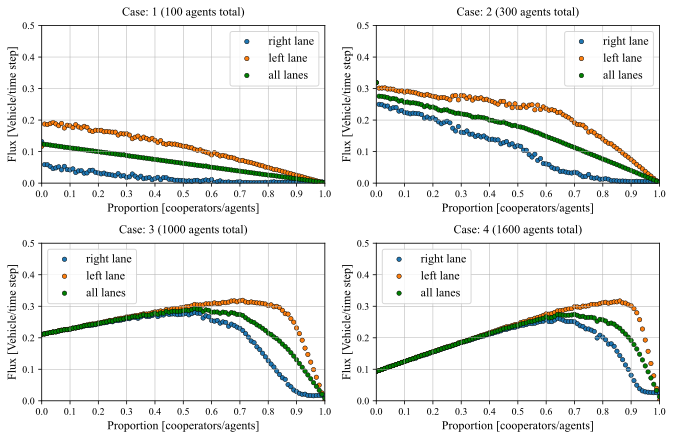

In [55]:
fs = 12

m, n = 2, 2

width, height = 16*1.5 / 2.54, 10.5*1.5 / 2.54 # in inch

fig, ax = plt.subplots(figsize=(width, height), nrows=m, ncols=n, tight_layout=True, dpi=300);

leg_loc = ['upper right', 'upper right', 'upper left', 'upper left']

sub = 'abcd'

lb = ['right', 'left']

for i in range(m*n):
    for k in range(rho.shape[2]):
        label = f'{lb[k]} lane'
        ax[i//2, i%2].scatter(proportion, flow[i,:,k], label=label, edgecolors='black', s=20, linewidths=0.5)
    label = "all lanes"
    ax[i//2, i%2].scatter(proportion, flow.mean(axis=2)[i], label=label, color='green', edgecolors='black', s=20, linewidths=0.5)
    ax[i//2, i%2].legend(loc=leg_loc[i], fontsize=fs)
    ax[i//2, i%2].set_xlim(0,1)
    ax[i//2, i%2].set_ylim(0,0.5)
    #ax[i].set_title(f'initial density {peop_arr[i]/n_cells/n_lane} ({peop_arr[i]} agents total) (${sub[i]}$)', fontsize=fs+2, pad=10)
    ax[i//2, i%2].set_title(f'Case: {i+1} ({peop_arr[i]} agents total)', fontsize=fs, pad=10)
    ax[i//2, i%2].set_xlabel(r'Proportion [cooperators/agents]',  fontsize = fs)
    ax[i//2, i%2].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
    ax[i//2, i%2].set_xticks(np.arange(0, 1.1, step=0.1))
    ax[i//2, i%2].grid(linewidth=0.5)
        
plt.show()

In [56]:
fig.savefig('calculate/data/city_lanes.tiff',  dpi=400, format='tiff', bbox_inches = "tight")

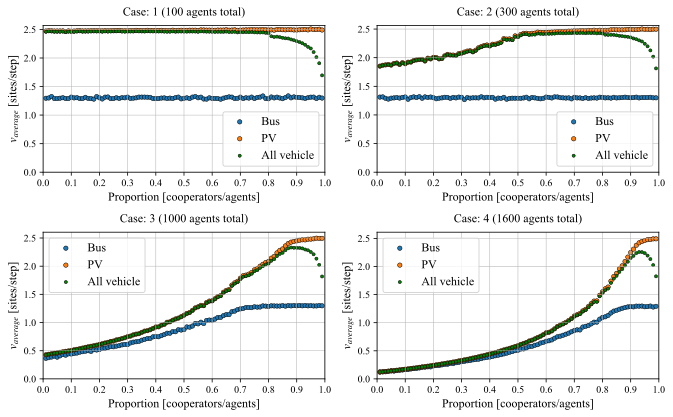

In [57]:
fs = 12

m, n = 2, 2

leg_loc = ['lower right', 'lower right', 'upper left', 'upper left']

width, height = 16*1.5 / 2.54, 10*1.5 / 2.54 # in inch

fig, ax = plt.subplots(figsize=(width, height), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m*n):

        ax[i//2, i%2].scatter(proportion[1:-1], velosity_bus[i,1:-1], label='Bus', edgecolors='black', s=20, linewidths=0.5)
        ax[i//2, i%2].scatter(proportion[1:-1], velosity_hdv[i,1:-1], label='PV', edgecolors='black', s=20, linewidths=0.5)
        ax[i//2, i%2].scatter(proportion[1:-1], velosity_all[i,1:-1], label="All vehicle", color='green', edgecolors='black', s=10, linewidths=0.5)
        ax[i//2, i%2].set_xlim(0,1)
        ax[i//2, i%2].set_xlabel(r'Proportion [cooperators/agents]',  fontsize = fs)
        ax[i//2, i%2].set_ylabel(r'$v_{average}$ [sites/step]',  fontsize = fs)
        ax[i//2, i%2].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i//2, i%2].set_yticks(np.arange(0, 2.6, step=0.5))
        ax[i//2, i%2].legend(loc=leg_loc[i], fontsize=fs)
        #ax[i].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} agents total)', fontsize=fs+2, pad=10)
        ax[i//2, i%2].set_title(f'Case: {i+1} ({peop_arr[i]} agents total)', fontsize=fs, pad=10)
        ax[i//2, i%2].grid(linewidth=0.5)
    
plt.show()

In [58]:
fig.savefig('calculate/data/city_average.tiff',dpi=400, format='tiff', bbox_inches = "tight")

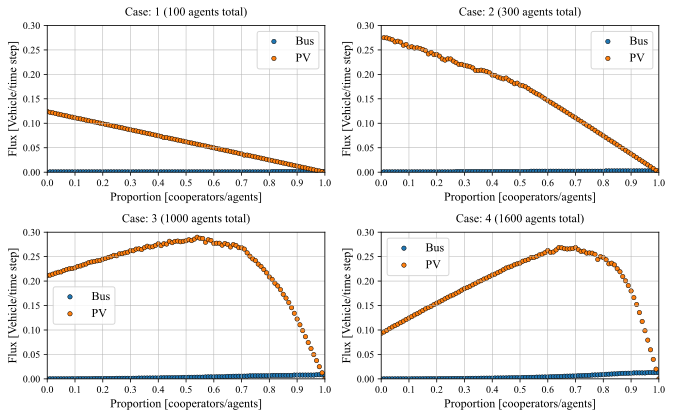

In [59]:
fs = 12

m, n = 2, 2

width, height = 16*1.5 / 2.54, 10*1.5 / 2.54 # in inch

fig, ax = plt.subplots(figsize=(width, height), nrows=m, ncols=n, tight_layout=True, dpi=300);

leg_loc = ['upper right', 'upper right', 'center left', 'upper left']

for i in range(m*n):
        #lane
        ax[i//2, i%2].scatter(proportion, (velosity_bus*rho_bus)[i,:], label="Bus", edgecolors='black', s=20, linewidths=0.5)
        ax[i//2, i%2].scatter(proportion, (velosity_hdv*rho_hdv)[i,:], label="PV", edgecolors='black', s=20, linewidths=0.5)
        ax[i//2, i%2].legend(loc=leg_loc[i], fontsize=fs)
        ax[i//2, i%2].set_xlim(0,1)
        ax[i//2, i%2].set_ylim(0,0.3)
        #ax[i].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} agents total)', fontsize=fs+2, pad=10)
        ax[i//2, i%2].set_title(f'Case: {i+1} ({peop_arr[i]} agents total)', fontsize=fs, pad=10)
        ax[i//2, i%2].set_xlabel(r'Proportion [cooperators/agents]',  fontsize = fs)
        ax[i//2, i%2].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
        ax[i//2, i%2].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i//2, i%2].grid(linewidth=0.5)
        
plt.show()

In [60]:
fig.savefig('calculate/data/city_vehicles.tiff', dpi=400, format='tiff', bbox_inches = "tight")